In [1]:
import time
import pickle
import scipy

import pandas as pd
import numpy as np

from pprint import pprint 
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns

%matplotlib inline

In [72]:
r_state = None #42 #8
basedir = "./pkls/"

In [4]:
def pickle_stuff(filename, data):
    ''' save file '''
    with open(filename, 'w') as picklefile:
        pickle.dump(data, picklefile)

def unpickle(filename):
    ''' open file '''
    with open(filename, 'r') as picklefile:
        old_data = pickle.load(picklefile)
    return old_data

In [32]:
feature_df = unpickle(basedir+"zscore_df.pkl")
print feature_df.head()

             track_id  duration   fade_in     tempo  tatum_density  \
0  TRBGPHG12903CE6CC3 -0.668187 -0.319412 -0.194199      -0.341662   
1  TRBGPYK128F42796E1  0.926188  4.084562  0.881785      -0.346080   
2  TRBGPJP128E078ED20  0.701886 -0.252490  3.120673      -1.693426   
3  TRBGPXH128F428C912 -0.088664 -0.236965 -0.668922      -0.342516   
4  TRBGPSV12903CA9C25  0.114352 -0.019068  1.451242      -0.347972   

   beat_density  segment_density  section_density  loudness  mode  \
0     -0.464571        -0.325730         1.088936 -1.007373     1   
1      0.578074         0.368890        -1.047679  0.092725     1   
2      2.638498        -0.615863        -0.244006  1.121520     0   
3      0.026966        -1.087565         1.220630 -1.041080     1   
4     -0.015188         0.577940         0.021840  0.868905     1   

       ...        timbre_mode3  timbre_mode4  timbre_mode5  timbre_mode6  \
0      ...            1.259628      1.189218      0.437165      0.945188   
1      ...  

In [33]:
features = feature_df.iloc[:,1:]
print features.head()

   duration   fade_in     tempo  tatum_density  beat_density  segment_density  \
0 -0.668187 -0.319412 -0.194199      -0.341662     -0.464571        -0.325730   
1  0.926188  4.084562  0.881785      -0.346080      0.578074         0.368890   
2  0.701886 -0.252490  3.120673      -1.693426      2.638498        -0.615863   
3 -0.088664 -0.236965 -0.668922      -0.342516      0.026966        -1.087565   
4  0.114352 -0.019068  1.451242      -0.347972     -0.015188         0.577940   

   section_density  loudness  mode  key_0      ...        timbre_mode3  \
0         1.088936 -1.007373     1      0      ...            1.259628   
1        -1.047679  0.092725     1      0      ...            0.536204   
2        -0.244006  1.121520     0      0      ...            1.117500   
3         1.220630 -1.041080     1      0      ...           -2.393088   
4         0.021840  0.868905     1      0      ...           -0.075974   

   timbre_mode4  timbre_mode5  timbre_mode6  timbre_mode7  timbre_mo

In [84]:
fks = [2]+range(10,160, 10) #+ range(200, 550, 50)
f_inertias = []
for k in fks:
    t1 = time.time()
    print k,
    if r_state:
        model = KMeans(n_clusters=k, n_jobs=6, random_state=r_state) #init='k-means++', max_iter=100,
    else:
        model = KMeans(n_clusters=k, n_jobs=6)
    model.fit(features)
    f_inertias.append(model.inertia_)
    print time.time()-t1, 

2 0.596232891083 10 4.80181217194 20 8.91685390472 30 18.5254380703 40 22.7422578335 50 20.6721570492 60 31.457005024 70 27.1873400211 80 36.8770310879 90 35.8726580143 100 34.7715477943 110 45.7481560707 120 44.382199049 130 44.3681080341 140 50.6707890034 150 49.5881130695


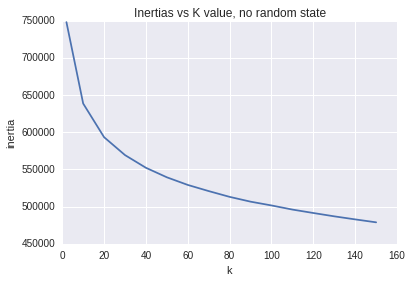

In [85]:
ax = plt.subplot(111)
plt.plot(fks, f_inertias)
plt.xlabel("k")
plt.ylabel("inertia")
if r_state:
    title = "Inertias vs K value, random state = "+str(r_state)
    plt.title(title)
else:
    plt.title("Inertias vs K value, no random state")
#plt_title = "InertiasvsK"+str(r_state)
#plt.savefig(plt_title)
plt.show()

In [94]:
def see_kmeans_args(X, model, limit=10):
    print("Top terms per cluster:")
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = list(X)
    #terms = raw_features
    #terms = rf_counts
    #print order_centroids
    for i in range(len(model.cluster_centers_)):
        print "Cluster %d:" % i,
        for ind in order_centroids[i, :limit]:
            #print terms[0][ind][0], 
            #f_ind = features.index(ind)
            print terms[ind],
            #print ' %s' % terms
        print

def run_k_means(X, k):
    if r_state:
        model = KMeans(n_clusters=k, n_jobs=6, random_state=r_state)#max_iter=100,  #init='k-means++'
    else:
        model = KMeans(n_clusters=k, n_jobs=6)
    model.fit(X)
    return model

In [95]:
k2 = 40
feature_model = run_k_means(features, k2)
see_kmeans_args(features, feature_model, limit=5)

Top terms per cluster:
Cluster 0: mode time_sig_4 timbre_median1 timbre_mean1 loud_median
Cluster 1: fade_in duration time_sig_4 mode beat_density
Cluster 2: time_sig_4 mode timbre_median11 timbre_mean11 timbre_median5
Cluster 3: timbre_mean5 timbre_median5 timbre_mean8 timbre_median8 mode
Cluster 4: timbre_median6 timbre_mean6 timbre_mean8 timbre_median8 timbre_mean3
Cluster 5: segment_density timbre_mean4 pitch_median7 duration pitch_median6
Cluster 6: pitch_mean10 mode pitch_mean3 pitch_median10 pitch_median3
Cluster 7: pitch_median9 pitch_mean9 pitch_median10 pitch_mean10 pitch_median11
Cluster 8: pitch_mean6 mode time_sig_4 pitch_median6 pitch_mode6
Cluster 9: timbre_mean4 timbre_median4 segment_density timbre_mean11 timbre_median11
Cluster 10: pitch_median10 pitch_mean10 mode pitch_mean5 time_sig_4
Cluster 11: pitch_median2 pitch_mean2 pitch_median1 pitch_mean1 segment_density
Cluster 12: timbre_mean12 timbre_median12 mode time_sig_4 timbre_mean5
Cluster 13: timbre_median6 timbre

In [96]:
cluster_numbers_f = feature_model.predict(features)
print cluster_numbers_f[:10]

[33 14 21 12 21  4 13  8 14 16]


In [97]:
f_centroids = feature_model.cluster_centers_
print f_centroids.shape

(40, 102)


In [98]:
c_labels_f = range(f_centroids.shape[0])
clusters_dict_f = {el:[] for el in c_labels_f}

for i, cna in enumerate(cluster_numbers_f):
    clusters_dict_f[cna].append(i)

#print clusters_dict_f[len(c_labels_f)-1]
print len(clusters_dict_f[0])
print len(clusters_dict_f[1])

418
59


In [78]:
#print feature_df.iloc[200]

In [99]:
mins = []
for lab, inds in clusters_dict_f.iteritems():
    xs = []
    print lab,
    
    #ten closest tracks
    mindists = [(9999999,9999,9999, len(inds)) for t in range(10)]
    for ind in inds:
        #nodes.append({"index": ind, "cluster": lab, "author": topics_authors[ind][1], \
        #              "topic": labels[authors[ind]-1][1]})
        #print ind
        xs.append(features.iloc[ind])
        
        dist = scipy.spatial.distance.euclidean(features.iloc[ind], f_centroids[lab])
        if dist < mindists[-1][0]:
            for i, m in reversed(list(enumerate(mindists))):
                if i > 0:
                    mindists[i] = mindists[i-1]
            mindists[0] = (dist, lab, ind, len(inds))
            mindists = sorted(mindists)
    mins.append(mindists)
#print
#print mins

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39


In [100]:
for m in mins:
    print m[0][1], m[0][3]

0 418
1 59
2 411
3 107
4 157
5 204
6 150
7 173
8 240
9 145
10 277
11 342
12 325
13 410
14 327
15 347
16 403
17 345
18 323
19 209
20 412
21 301
22 302
23 157
24 131
25 102
26 242
27 174
28 406
29 133
30 167
31 119
32 334
33 198
34 165
35 165
36 266
37 276
38 180
39 398


In [101]:
for m in mins:
    print "cluster:", m[0][1]
    for t in m:
        #print sorted(rf_counts[m[2]], key=lambda x:(-x[1],x[0]))[:20]
        pprint(feature_df.iloc[t[2]]["track_id"])
    print m[0][3], "total songs" 

cluster: 0
'TRARXLM12903CC2306'
'TRAFUTE128F930F510'
'TRBEAMO128F425B75F'
'TRADOSF128F9338ADB'
'TRBFUXQ128F145B135'
'TRABUHH12903CA9F20'
'TRAKVJE128F426B9DA'
'TRAHLQF12903CDB530'
'TRADTQK12903CB67C9'
'TRASVXM128F934792B'
418 total songs
cluster: 1
'TRAVXZP128F425C677'
'TRBBXWG128F148B444'
'TRBEKGR128F425DA44'
'TRAEARU128E0781A02'
'TRAAFSM128F425A2C5'
'TRAWABF128F92EC63A'
'TRARTEH128F4280823'
'TRBFPRL128F14569B9'
'TRAJSQA128F4263330'
'TRBCYXD12903CC7609'
59 total songs
cluster: 2
'TRAZSUJ128F4243934'
'TRAFYAV128F42ACA8C'
'TRAQDZM128F426444D'
'TRAFKBW128F428C4E6'
'TRAAIHL128F92E6DDA'
'TRAJQBX128F930166B'
'TRBCBFV128E0795B94'
'TRABKAS128F42AB822'
'TRAKDDB128F92D168A'
'TRAQBTU128F931BB1D'
411 total songs
cluster: 3
'TRAOWYT128F930D2DB'
'TRAMCUA128F4238312'
'TRANIJF128F422E570'
'TRBFRYD128F425E521'
'TRBGTCB128F42548C2'
'TRAQQTW128F1466D86'
'TRAKXUY128F4228046'
'TRBCKEI128F92FE542'
'TRATYVV128F931CF6E'
'TRAHOIN128F1473575'
107 total songs
cluster: 4
'TRBHYBZ128F4231376'
'TRAIJMO128F424C8AF'


##Clusters and closest track
```
non r_state model
cluster: 0
'TRADSBC128F429E4A4'
208 total songs
cluster: 1
'TRAYHUS128F9348A7A'
116 total songs
cluster: 2
'TRAGOVH128F42480F5'
544 total songs
cluster: 3
'TRAXJGB128F93476D7'
376 total songs
cluster: 4
'TRBDGQU128F146607A'
298 total songs
cluster: 5
'TRBDYAC128F4249498'
283 total songs
cluster: 6
'TRBHDSW128F42ABC12'
45 total songs
cluster: 7
'TRADSQX128F14B0418'
104 total songs
cluster: 8
'TRAHOOP128F42B62AB'
208 total songs
cluster: 9
'TRAEKCR128F14593A5'
263 total songs
cluster: 10
'TRAMCUA128F4238312'
110 total songs
cluster: 11
'TRAZNLT128F4264189'
87 total songs
cluster: 12
'TRACSXC12903CF9525'
393 total songs
cluster: 13
'TRAOWVD128F930C0D1'
230 total songs
cluster: 14
'TRATIGJ128F423B3A0'
150 total songs
cluster: 15
'TRBFQZS12903CC9965'
191 total songs
cluster: 16
'TRAXNOE128F149158A'
299 total songs
cluster: 17
'TRAUGLZ128F14AE500'
101 total songs
cluster: 18
'TRBBVYO128F146AEDC'
435 total songs
cluster: 19
'TRBFUNY128C7196B7D'
151 total songs
cluster: 20
'TRBECBM128F426AA34'
198 total songs
cluster: 21
'TRABAIO128F42938F9'
562 total songs
cluster: 22
'TRAPWSV128F4294DF4'
123 total songs
cluster: 23
'TRBEEQG128F42732AB'
189 total songs
cluster: 24
'TRAGOMV128F4274745'
246 total songs
cluster: 25
'TRANMKA128F426C3B0'
210 total songs
cluster: 26
'TRARSJD128F932BAF8'
583 total songs
cluster: 27
'TRAXKLH128F4289138'
347 total songs
cluster: 28
'TRBDQLL128E078B757'
296 total songs
cluster: 29
'TRBFWVA128F42265AD'
490 total songs
cluster: 30
'TRANXZM128F92D58DF'
210 total songs
cluster: 31
'TRAFNWS128F931A45D'
59 total songs
cluster: 32
'TRBFZRA128F427030C'
379 total songs
cluster: 33
'TRAUHZI12903CF91BE'
103 total songs
cluster: 34
'TRAWISL128F422B153'
161 total songs
cluster: 35
'TRAVXZP128F425C677'
55 total songs
cluster: 36
'TRBFJMR128F930B3A6'
559 total songs
cluster: 37
'TRBHRLC128F14AE627'
187 total songs
cluster: 38
'TRBFEGL128F9318DF4'
279 total songs
cluster: 39
'TRALZBP128F4263E1A'
172 total songs
```

In [102]:
pickle_stuff(basedir+"kmeans40_"+str(r_state)+"_2.pkl", feature_model)

In [103]:
with open(basedir+"trackspercluster_"+str(r_state)+"_2.txt", 'w') as tf:
    for m in mins:
        tf.write(str(m[0][3])+"\n")

In [104]:
with open(basedir+"toptracks_"+str(r_state)+"_2.txt", 'w') as ttf:
    for m in mins:
        for t in m:
            ttf.write(feature_df.iloc[t[2]]["track_id"] + " ")
        ttf.write("\n")
        

In [7]:
model = unpickle(basedir+'kmeans40.pkl')

In [11]:
see_kmeans_args(features, model, limit=5)

Top terms per cluster:
Cluster 0: timbre_mean3 timbre_median3 timbre_median6 timbre_mean6 timbre_mean9
Cluster 1: timbre_median4 timbre_mean4 pitch_median1 pitch_mean1 timbre_median10
Cluster 2: timbre_mean1 timbre_median1 pitch_mean3 pitch_median3 loud_mean
Cluster 3: mode pitch_mean3 time_sig_4 pitch_median3 key_7
Cluster 4: pitch_median10 pitch_mean10 mode pitch_mean5 time_sig_4
Cluster 5: pitch_mean4 pitch_median4 timbre_mean1 timbre_median1 loud_mean
Cluster 6: duration mode pitch_mode4 timbre_mean8 timbre_median8
Cluster 7: timbre_mean6 timbre_median6 timbre_mean8 timbre_median8 timbre_mean10
Cluster 8: pitch_median9 pitch_mean9 pitch_median11 pitch_median10 pitch_mean11
Cluster 9: timbre_mean12 timbre_median12 timbre_mean9 timbre_median9 mode
Cluster 10: timbre_median5 timbre_mean5 timbre_mean8 timbre_median8 mode
Cluster 11: timbre_median11 mode timbre_mean11 timbre_mean12 timbre_median12
Cluster 12: pitch_mean6 pitch_median6 mode time_sig_4 pitch_mean11
Cluster 13: mode time_s